# Atividade 9 - Arthur Cerveira
## Exercício 1: Erosão

O exercício 1 consiste em na implementação de uma função que aplique a operação morfológica de erosão em uma imagem. A imagem original em preto e branco está apresentada abaixo. Essa operação foi aplicada a diferentes elementos estruturantes.

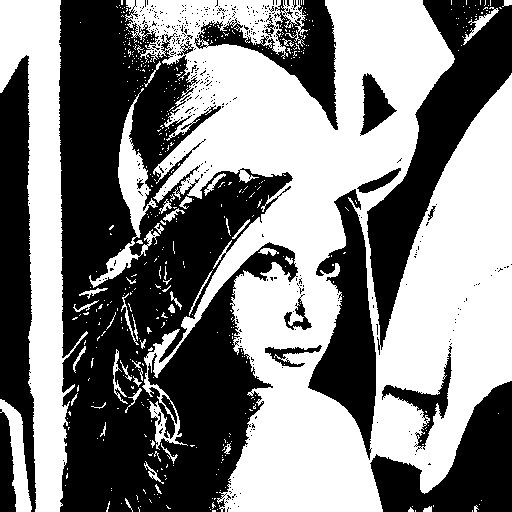

In [1]:
pkg load image

lenna = imread('./images/lena_cinza.bmp');

bw_image = im2bw(lenna(:, :, 1), 0.5);

imshow(bw_image);

In [2]:
function img_erodida = erosao(imagem, ES)
    [width, height] = size(imagem);
    
    img_erodida = zeros(width, height);
    
    [row,col] = find(ES != 0);
    es_positions = [row(:), col(:)];
    [es_lenght, _] = size(es_positions);
       
    for i = (1:width)
        for j = (1:height)
            result = 1;
            
            for es = (1:es_lenght)
                es_i = es_positions(es, 1);
                es_j = es_positions(es, 2);
                
                end_i = i + es_i;
            
                if (end_i > width)
                    end_i = width;
                endif

                end_j = j + es_j;

                if (end_j > height)
                    end_j = height;
                endif
                
                if imagem(end_i, end_j) == 0
                    result = 0;
                    break
                endif
            endfor
            
            img_erodida(i, j) = result;                    
        endfor
    endfor
    
    imshow(img_erodida);
endfunction

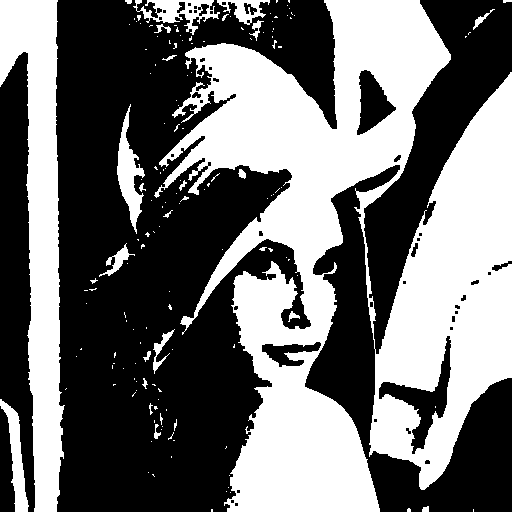

In [3]:
ES = [1, 1,1;
      1,-1,1;
      1, 1,1];

erosao(bw_image, ES);

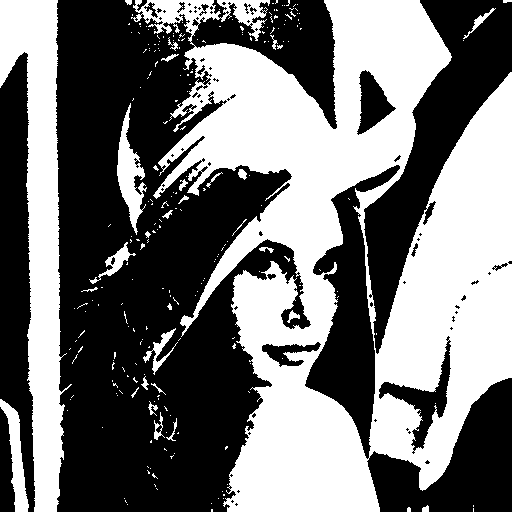

In [4]:
ES = [0, 1,0;
      1,-1,1;
      0, 1,0];

erosao(bw_image, ES);

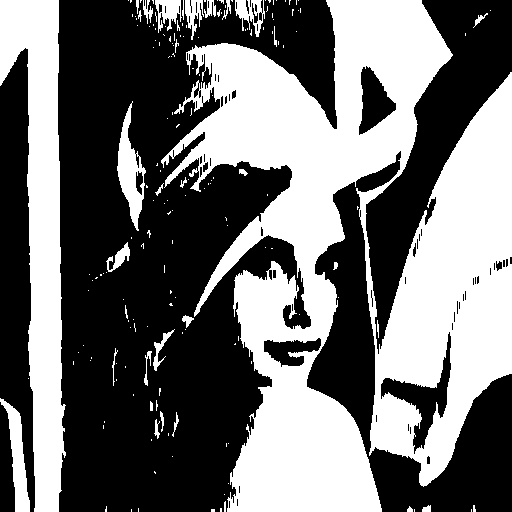

In [5]:
ES = [ 1;
       1;
       1;
      -1;
       1;
       1;
       1];

erosao(bw_image, ES);

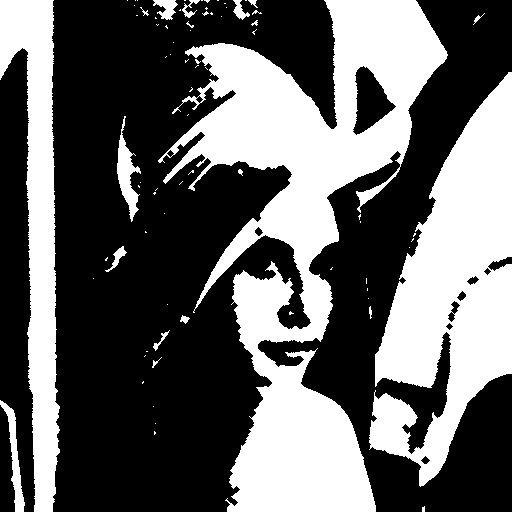

In [6]:
ES = [0,0,0, 1,0,0,0;
      0,0,1, 1,1,0,0;
      0,1,1, 1,1,1,0;
      1,1,1,-1,1,1,1;
      0,1,1, 1,1,1,0;
      0,0,1, 1,1,0,0;
      0,0,0, 1,0,0,0];

erosao(bw_image, ES);

## Exercício 2: Dilatação

O exercício 2 consiste em na implementação de uma função que aplique a operação morfológica de dilatação em uma imagem. Essa operação foi aplicada a diferentes elementos estruturantes.

In [7]:
function img_dilatada = dilata(imagem, ES)
    [width, height] = size(imagem);
    
    img_dilatada = zeros(width, height);
    [center_i, center_j] = find(ES == -1);
    [row,col] = find(ES == 1);
    
    es_positions = [row(:), col(:)];
    
    off_sets = (es_positions - [center_i, center_j]);

    [es_lenght, _] = size(es_positions);
       
    for i = (1:width)
        for j = (1:height)
            result = 1;
            
            if imagem(i, j) == 1
                img_dilatada(i, j) = 1;
                
                for es = (1:es_lenght)
                    es_i = off_sets(es, 1);
                    es_j = off_sets(es, 2);

                    end_i = i + es_i;

                    if (end_i > width)
                        end_i = width;
                    endif

                    if (end_i < 1)
                        end_i = 1;
                    endif

                    end_j = j + es_j;

                    if (end_j > height)
                        end_j = height;
                    endif

                    if (end_j < 1)
                        end_j = 1;
                    endif
                    
                    img_dilatada(end_i, end_j) = 1;
                endfor
            endif
        endfor
    endfor
    
    imshow(img_dilatada);
endfunction

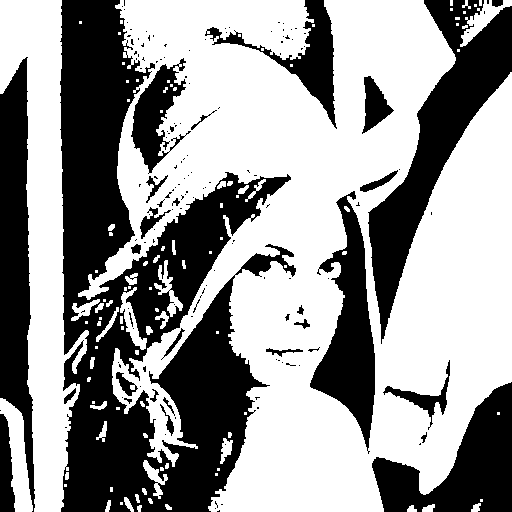

In [8]:
ES = [1, 1,1;
      1,-1,1;
      1, 1,1];

dilata(bw_image, ES);

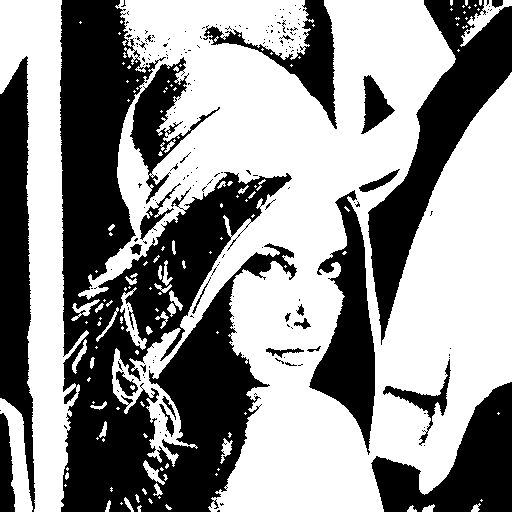

In [9]:
ES = [0, 1,0;
      1,-1,1;
      0, 1,0];

dilata(bw_image, ES);

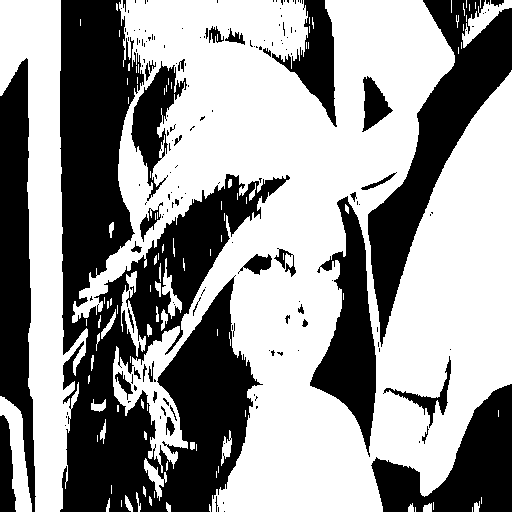

In [10]:
ES = [ 1;
       1;
       1;
      -1;
       1;
       1;
       1];

dilata(bw_image, ES);

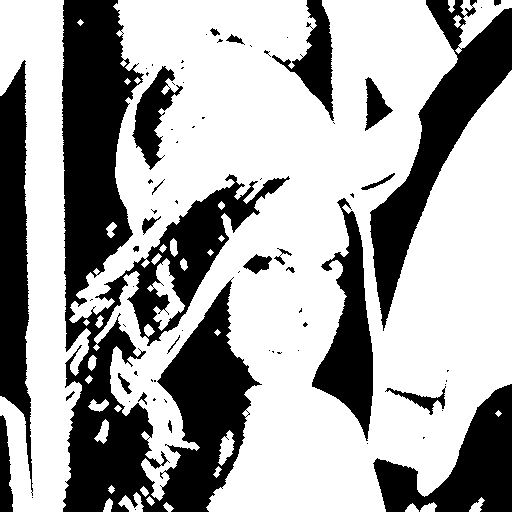

In [11]:
ES = [0,0,0, 1,0,0,0;
      0,0,1, 1,1,0,0;
      0,1,1, 1,1,1,0;
      1,1,1,-1,1,1,1;
      0,1,1, 1,1,1,0;
      0,0,1, 1,1,0,0;
      0,0,0, 1,0,0,0];

dilata(bw_image, ES);

## Exercício 3: Abertura e Fechamento

O exercício 2 consiste em na implementação de uma função que aplique a operação morfológica de abertura e outra de fechamento em uma imagem. Essas operações utilizam as funções de erosão e dilatação implementadas anteriormente.

In [12]:
function abertura(imagem, ES)
    img_erodida = erosao(imagem, ES);
    
    img_dilatada = dilata(img_erodida, ES);
    
    imshow(img_dilatada);
endfunction

function fechamento(imagem, ES)
    img_dilatada = dilata(imagem, ES);
    
    img_erodida = erosao(img_dilatada, ES);
    
    imshow(img_erodida);
endfunction

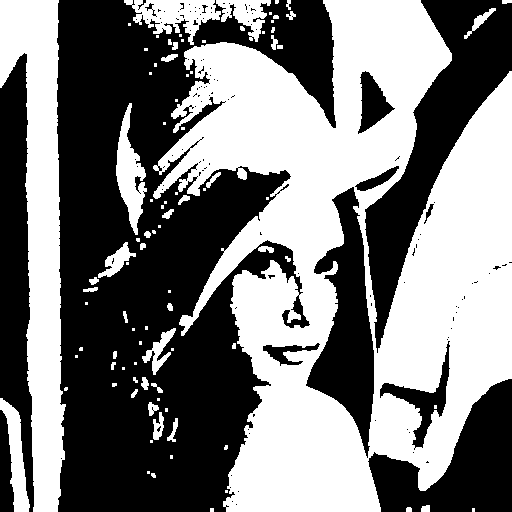

In [13]:
ES = [1, 1,1;
      1,-1,1;
      1, 1,1];

abertura(bw_image, ES);

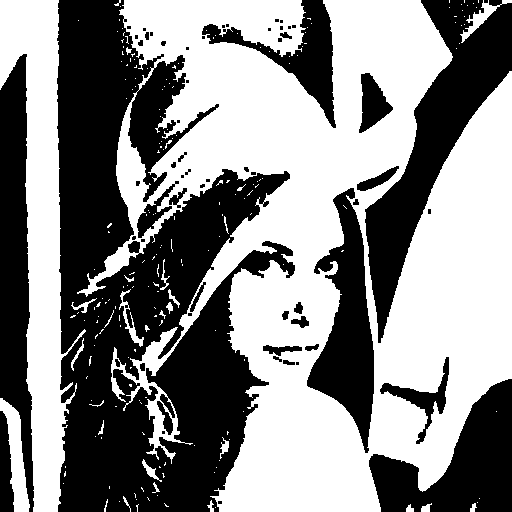

In [14]:
ES = [1, 1,1;
      1,-1,1;
      1, 1,1];

fechamento(bw_image, ES);